In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')

# Here we focus only on data from Lausanne marathon 2016 

In [2]:
data = pd.read_pickle('../datasets/trial_dataset')
data.head()

,nom,nat,an,lieu,temps,cat/rang
0,Bekele-Clerc Alemitu,BEL,1976,Bern,"2:42.41,0",42-D40
1,Yerly Laurence,SUI,1972,Cernier,"2:51.45,8",42-D40
2,Vrajic Marija,CRO,1976,CRO-Zagreb,Maksimir,42-D40
3,Morall Zelah,SUI,1969,GB-Penzance,"2:53.43,2",42-D40
4,Annen-Lamard Sandra,SUI,1977,Ecublens,-----,42-D30


## Stats on age

**Ideas**:
- statistical tests for men and women age over time:
    1. variance analysis (F test in normal case)
    2. mean analysis (T-test/ Welch test)
    3. plot with p-value and some critical thresholds (0.2,0.1,0.05,0.01)
- interactive plot of age distribution over time for men and women

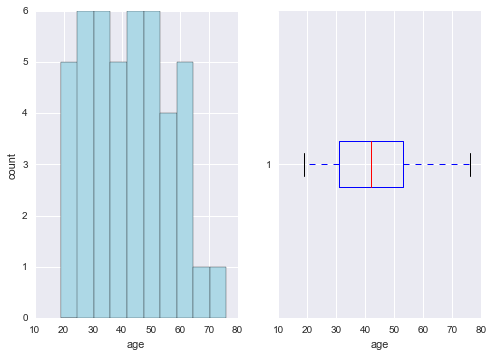

In [84]:
# get age of participants and plot its distribution
age = 2016 - data.an.value_counts().index.astype(int)
plt.subplot(1,2,1)
plt.hist(age,color='lightblue')
plt.xlabel('age')
plt.ylabel('count')
plt.subplot(1,2,2)
plt.boxplot(age,vert=False)
plt.xlabel('age')

# Merged dataset from Lausanne Marathon

Import merged dataset of 2016 Lausanne Marathon:

In [15]:
data = pd.read_pickle('lausanne.pickle')
data.head(10)

,cat,sex,rang,nom,an,lieu,temps,retard
0,21,M,147,Abaidia Jilani,1966,St-Légier-La Chiésaz,"1:45.28,4","25.56,8"
1,21,F,81,Abaidia Sandrine,1972,St-Légier,"1:49.40,8","24.09,5"
2,21,M,103,Abb Jochen,1948,Ernen,"2:50.40,7","1:21.28,7"
3,10,M,426,Abbas Dhia,1961,Lausanne,"1:13.04,1","38.13,0"
4,21,M,640,Abbet Florian,1982,Pully,"1:56.01,7","47.33,8"
5,10,F,517,Abdala Maria Lucia,1979,Lausanne,"1:01.30,8","27.09,1"
6,10,M,152,Abdela Esa,1992,Pully,"42.44,1","14.26,0"
7,21,M,67,Abdelaziem Ahmed Ramy Bac,1992,Lausanne,"1:29.06,1","20.32,9"
8,42,M,38,Abderhalden Matthias,1983,Chavannes-près-Renens,"3:08.43,6","51.37,4"
9,21,M,3,Abdesmed Mohamed,1956,F-Amiens,"1:33.24,8","4.12,8"


Take a look at the age distribution of the whole population:

In [61]:
age = data.an.value_counts()
age.index = 2016-age.index.astype(int)

28    381
37    347
29    343
31    343
33    338
27    336
36    336
42    336
30    330
32    326
34    326
35    321
39    316
44    307
43    305
26    303
41    296
38    290
40    278
45    277
46    274
25    264
47    252
48    252
24    250
50    246
23    237
51    230
49    221
22    197
     ... 
20    125
19    116
17    108
58    104
18    102
16     81
59     81
60     80
62     58
15     55
61     51
65     39
14     37
64     35
63     33
66     31
69     23
67     20
70     20
71     17
68     14
72     13
73      9
74      9
76      4
75      4
78      3
82      2
79      1
80      1
Name: an, dtype: int64

KeyError: 0

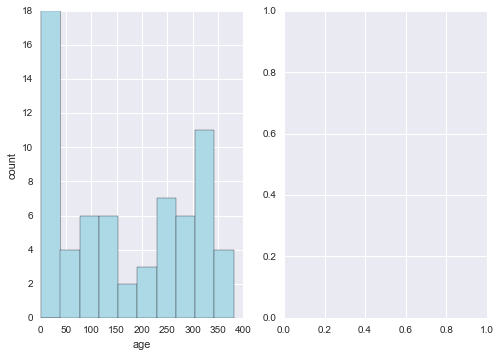

In [67]:
# get age of participants and plot its distribution
plt.subplot(1,2,1)
plt.hist(age,color='lightblue')
plt.xlabel('age')
plt.ylabel('count')
plt.subplot(1,2,2)
plt.boxplot(age,vert=False)
plt.xlabel('age')

Now compare the age distribution for women and men:

C:\Users\Utente\Anaconda3\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


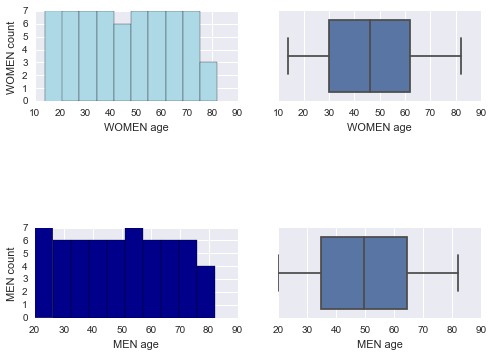

In [41]:
age_women = 2016 - data[data.sex=='F'].an.value_counts().index.astype(int)
age_men = 2016 - data[data.sex=='M'].an.value_counts().index.astype(int)
plt.subplot(3,2,1)
plt.hist(age_women,color='lightblue')
plt.xlabel('WOMEN age')
plt.ylabel('WOMEN count')
plt.subplot(3,2,5)
plt.hist(age_men,color='darkblue')
plt.xlabel('MEN age')
plt.ylabel('MEN count')
plt.subplot(3,2,2)
fig1 = sns.boxplot(age_women,vert=False)
fig1.set(xlabel='WOMEN age')
plt.subplot(3,2,6)
fig2 = sns.boxplot(age_men,vert=False)
fig2.set(xlabel='MEN age')

Int64Index([28, 27, 29, 26, 23, 32, 24, 31, 30, 37, 35, 25, 36, 33, 42, 39, 34,
            44, 41, 22, 45, 38, 40, 43, 46, 48, 51, 50, 47, 21, 49, 20, 52, 53,
            19, 18, 57, 55, 54, 17, 58, 56, 16, 60, 15, 61, 14, 59, 66, 62, 65,
            63, 69, 64, 70, 67, 71, 72, 74, 73, 79, 76, 68, 82, 75],
           dtype='int64')